---

layout: post
title: Virtebi Algorithm and Markov Chain - Part 1

---
## What is The Problem?

To find the **most probable** sequence of states given an observation (or you can call it a result). This **most probable** sequence of states is also called the **Virtebi Path**, sounds cool eh?. 

<center>
    <img src='https://media.giphy.com/media/qPd3ToldVPAfS/giphy.gif' width=300 height=300/>
</center>


## Hidden Markov Model and Markov Chain
Wait wait wait wait... now there is also [Markov Chain](https://en.wikipedia.org/wiki/Markov_chain) instead of [Hidden Markov Model](https://en.wikipedia.org/wiki/Hidden_Markov_model) ?!

<center>
        <img src='https://media.giphy.com/media/8p8E1sylIARDW/giphy.gif' width=300 height=300 />
</center>

Yes! looking at definitions at wikipedia, we could summarize that:
- Hidden Markov Model: has states that did not directly visible to observer
- Markov Chain : More general term, or you can call this is the parent for Hidden Markov Model.

n.b: throughout this post, I will use *Hidden Markov Model* and *Markov Chain* interchangeably.


## The Components of Markov Chain

A Markov Chain, in the simplest form, is essentially a [graph](https://en.wikipedia.org/wiki/Graph_(abstract_data_type)) that has:
1. Initial States
2. Transistion Probabilities
3. Emission Probabilities




## A Toy Example: Gandalf's Hidden Markov Model vs Balrog
In the lord of the ring, first movie/book (The Fellowship of the Ring), there is a wizard named Gandalf fighting A demon named Balrog
<center>
    <img src='https://media.giphy.com/media/wLV8TTCxXza5G/giphy.gif' width=300 height=300 />
</center>

In fighting Balrog, Gandalf could have 3 possible actions: **magic**, **defend**, and **run**. How do Gandalf decides which action to take? 


It depends on Balrog states! say Balrog can have 3 possible states: **Far_Attack**, **Move_To_Bridge**, **Run**. Says, you were Frodo, and watching Gandalf's fight, you can observe what actions did he took, but you want to know what state that Gandalf saw so that he has taken those action sequence. Assuming we know the components of Hidden Markov Model


In [1]:
# I will use numpy array to shorten the code
import numpy as np

In [2]:
obs = ('defend', 'defend', 'magic')
possible_actions = ('magic', 'defend', 'run')
states = ('Far_Attack', 'Move_To_Bridge', 'Run')
start_p = {'Far_Attack': 0.5, 'Move_To_Bridge': 0.4, 'Run': 0.1}
trans_p = {
    'Far_Attack': {'Far_Attack': 0.4, 'Move_To_Bridge': 0.55, 'Run': 0.05},
    'Move_To_Bridge': {'Far_Attack': 0.9, 'Move_To_Bridge': 0.05, 'Run': 0.05},
    'Run': {'Far_Attack': 0.05, 'Move_To_Bridge': 0.05, 'Run': 0.9},
}
emit_p = {
   'Far_Attack' : {'magic': 0.05, 'defend': 0.9, 'run': 0.05},
   'Move_To_Bridge' : {'magic': 0.5, 'defend': 0.4, 'run': 0.1},
   'Run' : {'magic': 0.1, 'defend': 0, 'run': 0.9}
}



In [3]:
import graphviz as gz
import pygraphviz as pgv
from IPython.display import Image

def draw(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))


Markov Chain Representation of Gandalf


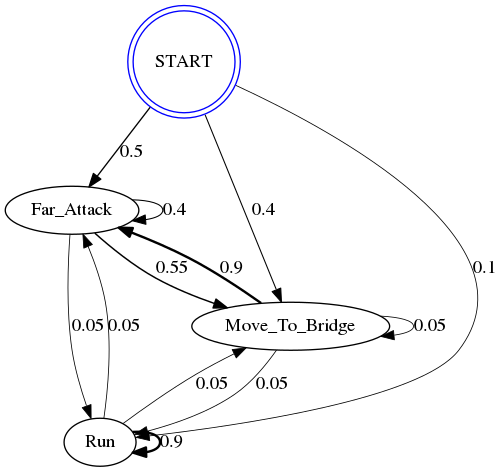

In [4]:
graph = gz.Digraph()


graph.node('START', 'START', shape='doublecircle', color='blue')
for state in states:
    graph.node(state, state)
    
for initial_transision in start_p:
    weight = start_p[initial_transision]
    graph.edge('START', initial_transision, 
               label='{}'.format(weight), weight='{}'.format(weight),
                penwidth='{}'.format(max(weight, 0.3) * 2))
    
for transision_state_from in trans_p:
    transision = trans_p[transision_state_from]
    for transision_state_to in transision:
        weight = transision[transision_state_to]
        graph.edge(transision_state_from, transision_state_to, 
               label='{}'.format(weight), weight='{}'.format(weight),
                penwidth='{}'.format(max(weight, 0.3) * 2))
    

print('Markov Chain Representation of Gandalf')
draw(graph.source)

Full Markov Chain Representation of Gandalf


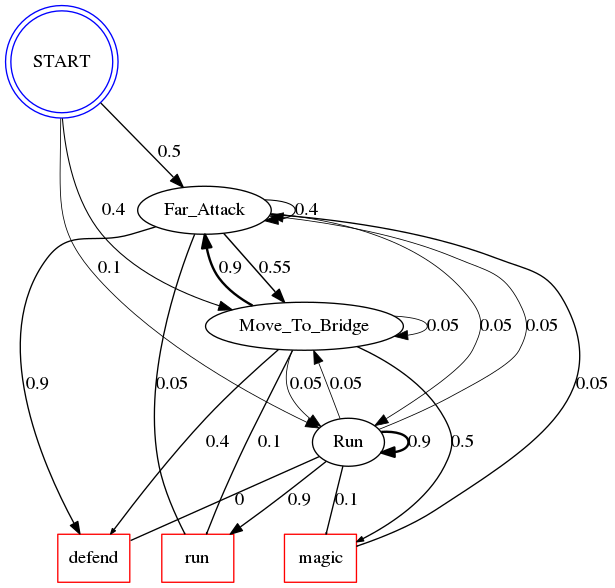

In [5]:
graph = gz.Digraph()


graph.node('START', 'START', shape='doublecircle', color='blue')
for state in states:
    graph.node(state, state)
for action in possible_actions:
    graph.node(action, action, shape='rectangle', color='red')

for initial_transision in start_p:
    weight = start_p[initial_transision]
    graph.edge('START', initial_transision, 
               label='{}'.format(weight), weight='{}'.format(weight),
                penwidth='{}'.format(max(weight, 0.3) * 2))
    
for transision_state_from in trans_p:
    transision = trans_p[transision_state_from]
    for transision_state_to in transision:
        weight = transision[transision_state_to]
        graph.edge(transision_state_from, transision_state_to, 
               label='{}'.format(weight), weight='{}'.format(weight),
                penwidth='{}'.format(max(weight, 0.3) * 2))
        
for emission_state_from in emit_p:
    emission = emit_p[emission_state_from]
    for action in emission:
        weight = emission[action]
        graph.edge(emission_state_from, action, 
               label='{}'.format(weight), weight='{}'.format(weight),
                arrowsize='{}'.format(weight))

print('Full Markov Chain Representation of Gandalf')
draw(graph.source)

### Naive Approach to Answer This Problem


So how to answer "What was Gandalf sees?" when he takes action "defend, defend, magic" ? 

we need to find the most probable sequence! so how do we do it? Well we can try to generate all the combination and count the probabilities of that sequence happening, given the observation / action taken in this case...

$$
P (state\_sequence | action\_sequence) = (initial\_probability * emission_{1}) * \prod\limits_{i=2}^{I}{transition_{i-1 -> i} * emission_{i}}
$$

$i$ is the sequence index

For example: 

our observation is: **defend, defend, magic**


then, the probability of Balrog in state "Far_Attack", "Far_Attack", "Far_Attack" is :
$$
    (0.5 * 0.9) * (0.4 * 0.9) * (0.4 * 0.05) = 0.00324 
$$

So we draw a table that looks like:

| Seq1 | Seq2 | Seq3 | Probability |
|------|------|------|-------------|
| Far_Attack     | Far_Attack     | Far_Attack     |  0.00324           |
| Far_Attack     | Far_Attack     | Run     |  0,00081           |

And it's goes on until all the sequence possibility is exhausted, but lets generate the naive algorithm to do that!

In [6]:
def generate_combination(element_space, n):
    """
    helper function to generate sequence combination 
    from element space for n sequence
    """
    if n <= 1:
        return element_space
    else:
        combination = list()
        for el1 in element_space:
            x = list()
            
            for el2 in generate_combination(
                element_space, n - 1):
                # flatten the list by 
                # appending el1 into the first element of el2
                if isinstance(el2, list):
                    x = [el1] + el2
                else:
                    x = [el1, el2]
                combination.append(x)
        return combination

In [7]:
def naive(state_space, initial_probabilities, 
          observations, transition_matrix, emission_matrix):
    """
    Find the most probable sequence in naive manner. 
    Compute all the probabilities for all sequences then
    find the sequence that has maximum probability 
    of happening
    """
    # generate sequences of state
    all_possible_state_seq = generate_combination(
        state_space, 
        len(observations))
            
    # calculate each sequence probabilities, given the observation:
    all_seq_prob = list()
    for possible_state_seq in all_possible_state_seq:
        p = 1
        for state_i in range(len(possible_state_seq)):
            
            current_state = possible_state_seq[state_i]
            current_observation = observations[state_i]
            # use initiate state probability 
            # if it is the first sequence:
            # otherwise use transition, given previous state
            if state_i == 0:
                p1 = initial_probabilities[current_state]
            else:
                p1 = transition_matrix[
                    prev_state
                ][current_state]
            # find the P(state|observation)
            #, example: P(Healthy|cold)
            p2 = emission_matrix[
                current_state
            ][current_observation]
            prev_state = current_state
            
            # calculate product of  
            # P(state|prev_state) * P(state|observation)
            p *= p1 * p2
        all_seq_prob.append(p)
    
    max_index = np.argmax(all_seq_prob)
    return (all_possible_state_seq[max_index], all_seq_prob[max_index])



In [8]:

seq, p = naive(states, start_p, obs, trans_p, emit_p)
print('The most probable state of Balrog, when Gandalf has taken the action ("defend, defend, magic") is:')
print('{} with probability of {}'.format(seq, p))

The most probable state of Balrog, when Gandalf has taken the action ("defend, defend, magic") is:
['Far_Attack', 'Far_Attack', 'Move_To_Bridge'] with probability of 0.04455000000000001


In [9]:
%%timeit
naive(states, start_p, obs, trans_p, emit_p)

68.4 µs ± 415 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### A Smarter Move: Virtebi Algorithm



In [27]:
def virtebi(states, initial_probabilities, observations, transition_matrix, emission_matrix):
    V = [{}]
    
    # fill in the initial probability
    for state in states:
        V[0][state] = {
            'prob': initial_probabilities[state] * emission_matrix[state][observations[0]],
            'prev_state': None
        }
   # now instead of re-calculating the probabilities, we could use max of previous value
    for i in range(1, len(obs)):
        V.append({})
        for state in states:
            max_prev_prob = 0
            for prev_state in states:
                prev_prob = V[i-1][prev_state]['prob'] * transition_matrix[prev_state][state]
                if max_prev_prob < prev_prob:
                    max_prev_prob = prev_prob
                    max_prev_state = prev_state
            
            V[i][state] = {
                'prob': max_prev_prob * emission_matrix[state][obs[i]],
                'prev_state': max_prev_state
            }
            
    # after we have constructed the markov chain, 
    # we can then find the most probable sequence of states through backtrack
    
    
    max_val = None
    max_prob = 0
    max_state = None
    for st in V[-1]:
        val = V[-1][st]
        if max_prob < val['prob']:
            max_state = st
            max_val = val
    max_prob = max_val['prob']
    
    # do the backtrack
    max_sequence = list()
    prev_st = max_val['prev_state']
    
    max_sequence.append(prev_st)
    max_sequence.append(max_state)
    
    for i in range(len(obs) - 2, 0, -1):
        prev_st = V[i][prev_st]['prev_state']
        max_sequence.insert(0, prev_st)
    return (max_sequence, max_prob, V)
    
    

In [29]:
max_seq, p_seq, markov_chain = virtebi(states, start_p, obs, trans_p, emit_p)
print('The most probable state of Balrog, when Gandalf has taken the action ("defend, defend, magic") is:')
print('{} with probability of {}'.format(max_seq, p_seq))

The most probable state of Balrog, when Gandalf has taken the action ("defend, defend, magic") is:
['Far_Attack', 'Far_Attack', 'Move_To_Bridge'] with probability of 0.04455000000000001


Wow! it produces the same result!
<center>
    <img src='https://media.giphy.com/media/l0Iy69RBwtdmvwkIo/giphy.gif' width=300 height=300 />
</center>



Now I will visualize how this model works and which path that it takes.


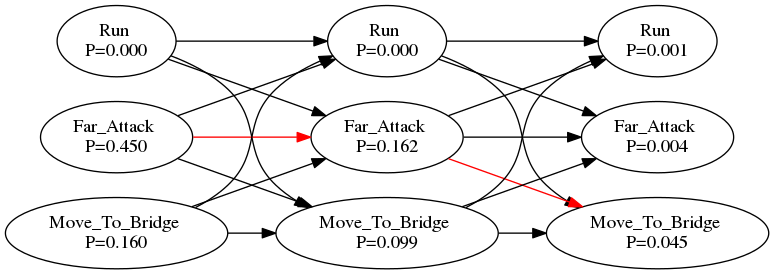

In [50]:
graph = gz.Digraph()
graph.attr(rankdir='LR')

for i in range(len(markov_chain)):
    for state_key in markov_chain[i]:
        graph.node(
            '{}_{}'.format(state_key, i), 
            '{} \nP={:.3f}'.format(state_key, markov_chain[i][state_key]['prob']),
        )
        
for i in range(1, len(markov_chain)):
    for state_key in markov_chain[i]:
        for prev_state in states:
            color = 'black'
            if max_seq[i] == state_key and max_seq[i-1] == prev_state:
                color = 'red'
            graph.edge(
                '{}_{}'.format(prev_state, i-1), 
                '{}_{}'.format(state_key, i),
                color=color
            )
        
draw(graph.source)


In the figure above, the red arrow is the sequence that the model took. Determining the sequence is actually a *backtrack* process, moving from the final state with maximum likelihood/probabilty and move back to a state which will cause it.

And now, last but not least, I should show you the improvement from the **naive** algorithm

In [51]:
%%timeit
max_seq, p_seq, markov_chain = virtebi(states, start_p, obs, trans_p, emit_p)

9.44 µs ± 108 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


At this state, it does not shows a big difference between the two algorithm. But then if I add more states and more observations, this algorithm will beat the naive algorithm!

<center>
    <img src='https://media.giphy.com/media/njYrp176NQsHS/giphy.gif' width=300 height=300 />
</center>

# References
- https://en.wikipedia.org/wiki/Viterbi_algorithm
- http://blog.ivank.net/viterbi-algorithm-clarified.html
- https://courses.engr.illinois.edu/cs447/fa2017/Slides/Lecture07.pdf